<a href="https://colab.research.google.com/github/GuyFarb/Cars-Project/blob/main/Get_Start.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
import glob
data_dir = "/content/drive/MyDrive/Car196_project/data/"
!ls "/content/drive/MyDrive/Car196_project/data"
# איתור כל קובצי ה-TFRecord בתיקייה
train_files = glob.glob(data_dir + "cars196-train.tfrecord-*")
test_files = glob.glob(data_dir + "cars196-test.tfrecord-*")

# הצגת רשימת הקבצים שנמצאו
print("📂 קבצי אימון:", train_files)
print("📂 קבצי בדיקה:", test_files)

cars196-test.tfrecord-00000-of-00008   cars196-train.tfrecord-00002-of-00008
cars196-test.tfrecord-00001-of-00008   cars196-train.tfrecord-00003-of-00008
cars196-test.tfrecord-00002-of-00008   cars196-train.tfrecord-00004-of-00008
cars196-test.tfrecord-00003-of-00008   cars196-train.tfrecord-00005-of-00008
cars196-test.tfrecord-00004-of-00008   cars196-train.tfrecord-00006-of-00008
cars196-test.tfrecord-00005-of-00008   cars196-train.tfrecord-00007-of-00008
cars196-test.tfrecord-00006-of-00008   dataset_info.json
cars196-test.tfrecord-00007-of-00008   image.image.json
cars196-train.tfrecord-00000-of-00008  label.labels.txt
cars196-train.tfrecord-00001-of-00008
📂 קבצי אימון: ['/content/drive/MyDrive/Car196_project/data/cars196-train.tfrecord-00000-of-00008', '/content/drive/MyDrive/Car196_project/data/cars196-train.tfrecord-00001-of-00008', '/content/drive/MyDrive/Car196_project/data/cars196-train.tfrecord-00002-of-00008', '/content/drive/MyDrive/Car196_project/data/cars196-train.tfreco

In [4]:
# קובץ לדוגמה
tfrecord_file = "/content/drive/MyDrive/Car196_project/data/cars196-train.tfrecord-00000-of-00008"

# יצירת dataset לקריאה
raw_dataset = tf.data.TFRecordDataset([tfrecord_file])

# הצגת רשומה ראשונה כדי לבדוק את המבנה
for raw_record in raw_dataset.take(1):
    example = tf.train.Example()
    example.ParseFromString(raw_record.numpy())
    print(example)

features {
  feature {
    key: "label"
    value {
      int64_list {
        value: 194
      }
    }
  }
  feature {
    key: "image"
    value {
      bytes_list {
        value: "\377\330\377\340\000\020JFIF\000\001\001\002\000\034\000\034\000\000\377\342\031\374ICC_PROFILE\000\001\001\000\000\031\354appl\002\020\000\000mntrRGB XYZ \007\332\000\006\000\027\000\024\000\014\000,acspAPPL\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\366\326\000\001\000\000\000\000\323-appl\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\021desc\000\000\001P\000\000\000bdscm\000\000\001\264\000\000\002Bcprt\000\000\003\370\000\000\000\320wtpt\000\000\004\310\000\000\000\024rXYZ\000\000\004\334\000\000\000\024gXYZ\000\000\004\360\000\000\000\024bXYZ\000\000\005\004\000\000\000\024rTRC\000\000\005\030\000\000

In [5]:
def parse_tfrecord(example):
  feature_description = {
      'image':tf.io.FixedLenFeature([],tf.string),
      'label':tf.io.FixedLenFeature([],tf.int64)
  }

  example = tf.io.parse_single_example(example,feature_description)
  image = tf.image.decode_jpeg(example['image'],channels=3)
  image = tf.image.resize(image,(224,224))
  image = tf.cast(image,tf.float32)/255.0

  label = example['label']
  return image,label

In [6]:
BATCH_SIZE = 32
AUTOTUNE = tf.data.AUTOTUNE

# טעינת קובצי ה-TFRecord
train_dataset = tf.data.TFRecordDataset(train_files)
test_dataset = tf.data.TFRecordDataset(test_files)

# פענוח הקובץ והגדרת ה-Pipeline
train_dataset = (train_dataset
    .map(parse_tfrecord, num_parallel_calls=AUTOTUNE)
    .shuffle(1000)  # ערבוב כדי למנוע למידת יתר
    .batch(BATCH_SIZE)
    .prefetch(AUTOTUNE)
)

test_dataset = (test_dataset
    .map(parse_tfrecord, num_parallel_calls=AUTOTUNE)
    .batch(BATCH_SIZE)
    .prefetch(AUTOTUNE)
)

print("✅ הדאטה מוכן לאימון!")

✅ הדאטה מוכן לאימון!


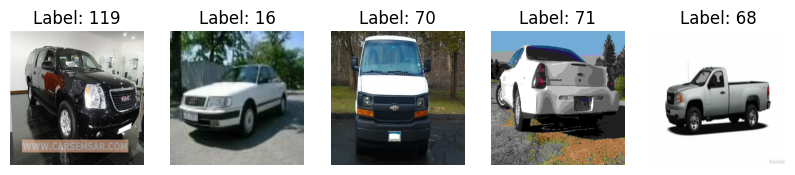

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

for images, labels in train_dataset.take(1):  # לוקח באצ' ראשון
    for i in range(5):
        plt.subplot(1,5,i+1)
        plt.imshow(images[i].numpy())  # הצגת תמונה
        plt.title(f"Label: {labels[i].numpy()}")  # הצגת תווית
        plt.axis("off")

plt.show()

#counter

In [9]:
train_count = sum(1 for _ in train_dataset)
test_count = sum(1 for _ in test_dataset)

print(f"🔢 מספר דוגמאות באימון: {train_count}")
print(f"🔢 מספר דוגמאות בבדיקה: {test_count}")

KeyboardInterrupt: 

#distribiotion

In [45]:
import collections
label_counts = collections.defaultdict(int)

for _, labels in train_dataset:
  for label in labels.numpy():
    label_counts[label]+=1


print(f"מספר מחלקות/סוגי רכבים {len(label_counts)}")

list(label_counts.items())[:10]

מספר מחלקות/סוגי רכבים 196


[(95, 41),
 (100, 42),
 (72, 45),
 (177, 42),
 (166, 48),
 (117, 42),
 (21, 43),
 (27, 41),
 (148, 43),
 (68, 38)]

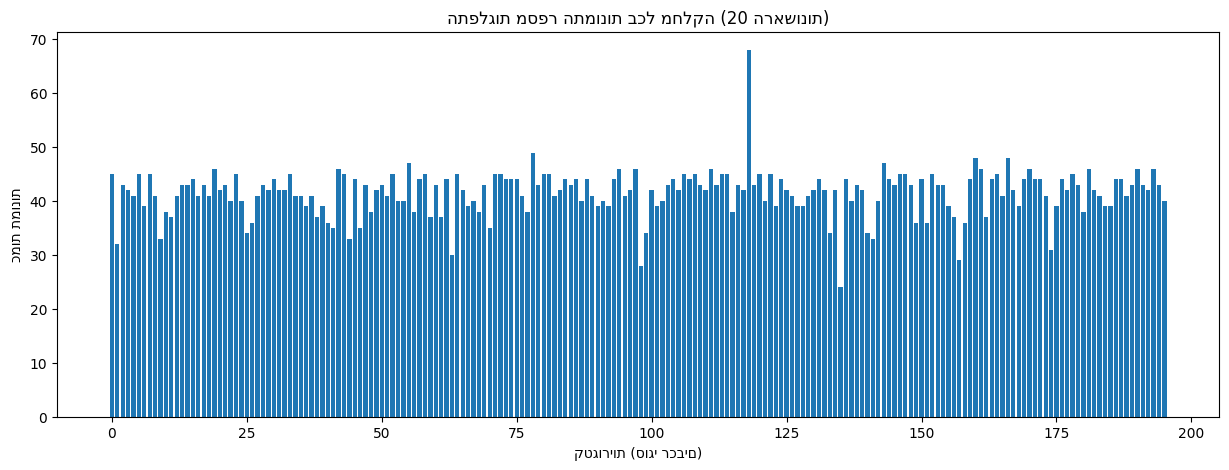

In [49]:
import matplotlib.pyplot as plt

# מיון המחלקות לפי מספר תמונות
sorted_counts = sorted(label_counts.items(), key=lambda x: x[1], reverse=True)

# יצירת גרף התפלגות
plt.figure(figsize=(15,5))
plt.bar([x[0] for x in sorted_counts[:196]], [x[1] for x in sorted_counts[:196]])
plt.xlabel("קטגוריות (סוגי רכבים)")
plt.ylabel("כמות תמונות")
plt.title("התפלגות מספר התמונות בכל מחלקה (20 הראשונות)")
plt.show()

In [7]:
def serialize_example(image, label):
    feature = {
        "image": tf.train.Feature(bytes_list=tf.train.BytesList(value=[tf.io.encode_jpeg(tf.cast(image * 255, tf.uint8)).numpy()])),
        "label": tf.train.Feature(int64_list=tf.train.Int64List(value=[label.numpy()]))
    }
    example = tf.train.Example(features=tf.train.Features(feature=feature))
    return example.SerializeToString()

# נתיב לשמירת הקובץ
tfrecord_path = "/content/drive/MyDrive/Car196_project/processed_cars196.tfrecord"

# יצירת TFRecord חדש
with tf.io.TFRecordWriter(tfrecord_path) as writer:
    for image, label in train_dataset.unbatch().take(5000):  # שמירת 5000 תמונות לדוגמה
        example = serialize_example(image, label)
        writer.write(example)

print(f"✅ הקובץ {tfrecord_path} נשמר בהצלחה!")

✅ הקובץ /content/drive/MyDrive/Car196_project/processed_cars196.tfrecord נשמר בהצלחה!
